## Progress Report 1

In [154]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For Scaling Matrices
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import imblearn

# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Oversampling
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

# import linrary
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# MSE
from sklearn.metrics import mean_squared_error

#SGD Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Create linear regression "object"
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.pipeline import Pipeline

# R2 
# coefficient of determination
from sklearn.metrics import r2_score

# Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

## Credit Card Fraud Data

In [155]:
# Read in Credit Card Fraud Detection

credit_df = pd.read_csv('C:/Users/12563/Documents/Statistical & Machine Learning (MATH 6388)/Project/creditcard.csv')

credit_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


We can see that the Credit Card Fraud Detection Data contains 31 fatures with 284,807 unique smaples.

In [156]:
# Shape of Credit Data Frame
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [157]:
# We will use the "describe" function to
# generate descriptive statistics

credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


All variables are numberical (Continuous), not categorical, so we are good to go. No need to create Dummy Variables here.

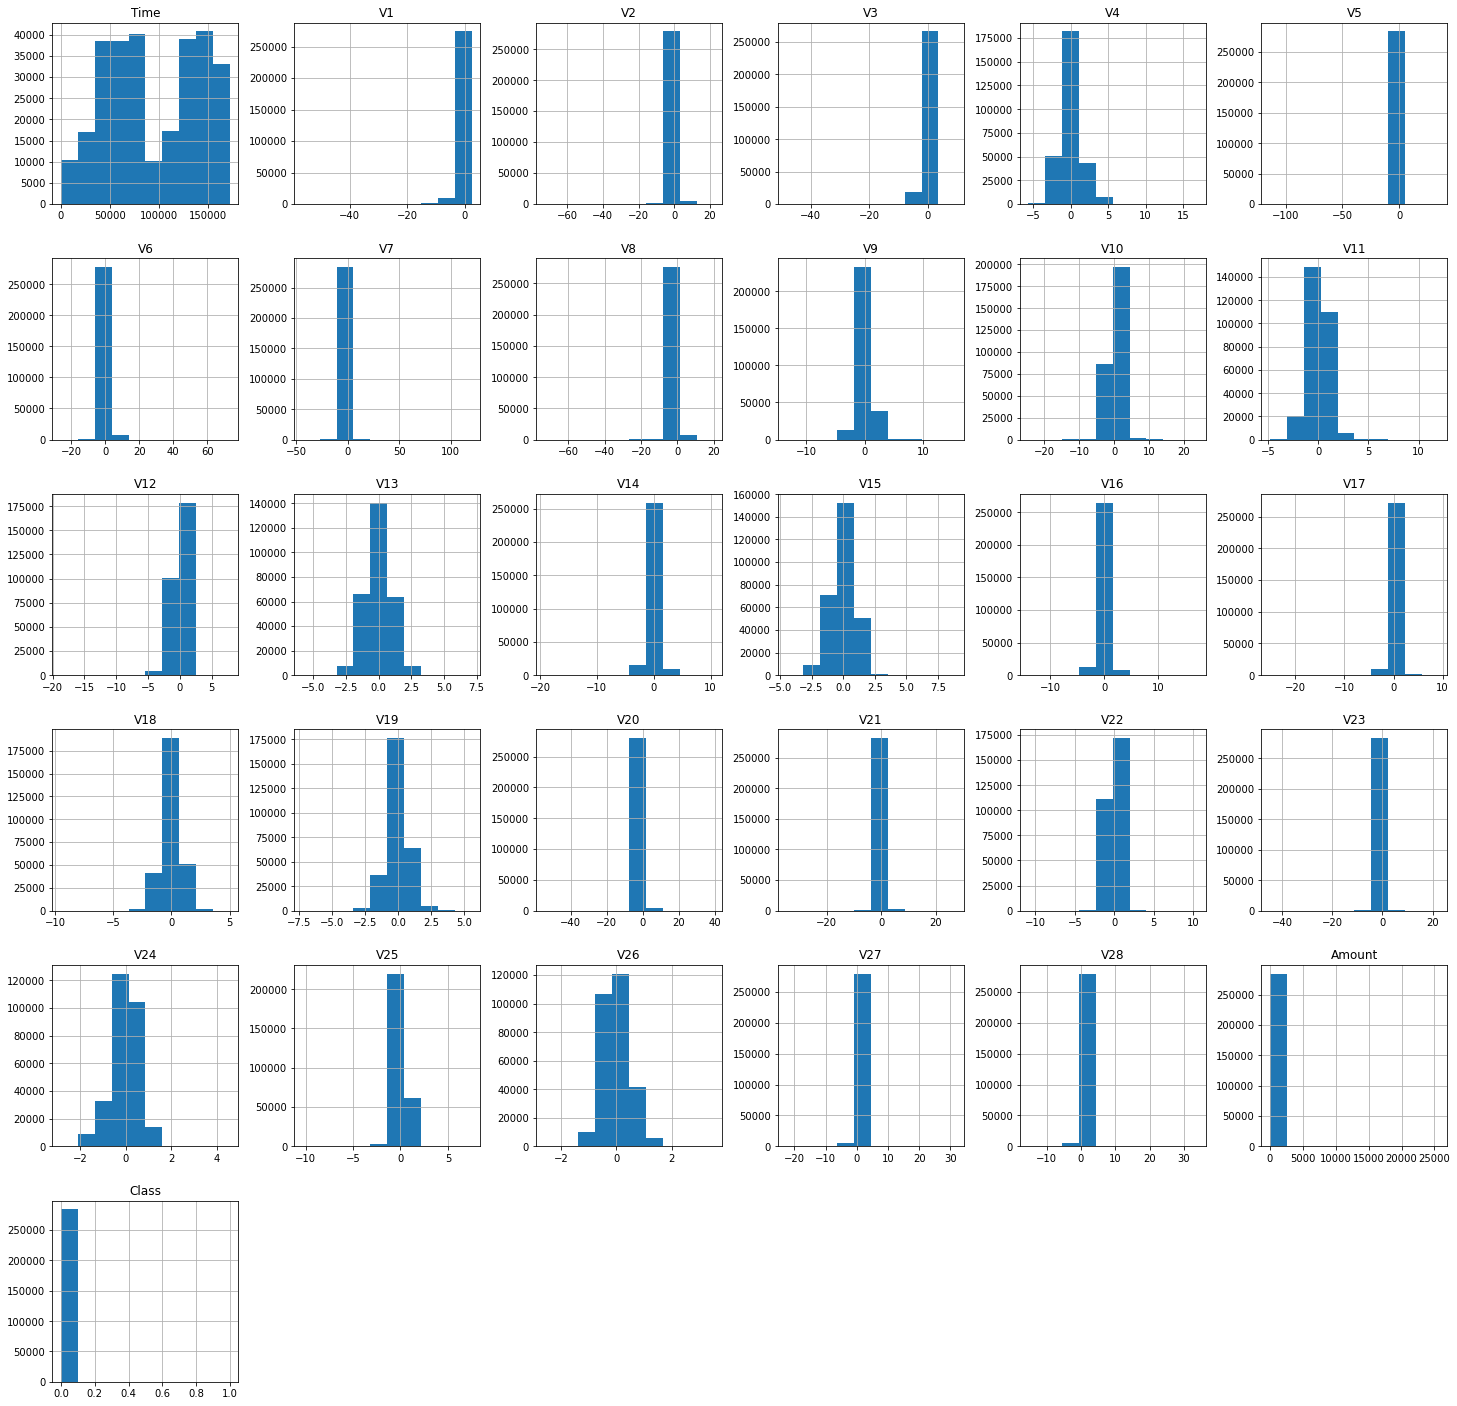

In [158]:
credit_df.hist(figsize = (25,25))
plt.show()

In [159]:
# Create the Feature Matrix & convert to Numpy Array
# Drop the Time & Class columns to create the Feature Matrix

X = credit_df.drop(columns = ['Class', 'Time']).to_numpy()
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [160]:
# Check the shape of X
X.shape

(284807, 29)

In [161]:
# Scale X 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [162]:
# Creating the Target Vector Y

# 1 is fraud, 0 otherwise

y = credit_df['Class'].to_numpy()
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [163]:
# Check the Shape of y
y.shape

(284807,)

In [164]:
print("The percentage of Credit Card Transactions that are Fraudlant is as follows:", (np.sum(credit_df['Class'] == 1)/284807) *100)

print("While the percentage of Credit Card Transactions that are NOT Fraudlant is as follows:", (np.sum(credit_df['Class'] == 0)/284807) *100)

The percentage of Credit Card Transactions that are Fraudlant is as follows: 0.1727485630620034
While the percentage of Credit Card Transactions that are NOT Fraudlant is as follows: 99.82725143693798


Thus, since the percentage of Credit Card Transactions that are Fraudlant is 0.17% while the percentage of credit card transactions that are not fraudlant is 99.83%. We can easily see that we have an imbalanced data set. 

Note that this is a classification Problem with an unequal distribution of classes in the training data set, classifying a Credit Card Transaction as Fraud or not. Very unequal with only 0.17% of the credit card transactions are actual fradulant transactions. 

We need to implement one of the methods implemented in Lecture 5 to attain reasonable performance

We will implement the Random Under-Sampling method with imblearn to balance the data.

In [166]:
# Random Under Smapling via imblearn
RUS = RandomUnderSampler(random_state=42, replacement=True)
X_RUS, y_RUS = RUS.fit_resample(X, y)

print('Original Counts:', Counter(y))
print('Resampled datset Counts', Counter(y_RUS))
print('Noting that 1 is fraudulent cases and 0 is non-fraudulent')

Original Counts: Counter({0: 284315, 1: 492})
Resampled datset Counts Counter({0: 492, 1: 492})
Noting that 1 is fraudulent cases and 0 is non-fraudulent


In [167]:
# Splitting the Random Under Sampling Data
X_train_RUS, X_test_RUS, y_train_RUS, y_test_RUS = train_test_split(X_RUS, y_RUS, random_state=0, train_size = .75)

In [168]:
# SGD Classifer to classify Credit Card Tranastions as Fraud or not
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# accuracy: the fraction of correct predictions over the total number of samples
cv_score = cross_val_score(sgd_clf, X_train_RUS, y_train_RUS, cv=10, scoring="accuracy")

cv_score_mean = cv_score.mean()
cv_score_mean

0.9362828582006664

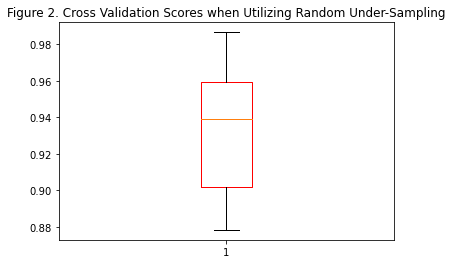

In [143]:
# plot
plt.boxplot(cv_score, boxprops=dict(color='red'))
plt.title('Figure 2. Cross Validation Scores when Utilizing Random Under-Sampling');

In [169]:
# Let's investigate this "amazing" result more by defining a
# classifier that always returns False
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
cross_val_score(Never5Classifier(), X_train_RUS, y_train_RUS, cv=3, scoring="accuracy").mean()

0.5054200542005419

In [170]:
cv_never = cross_val_score(Never5Classifier(), X_train_RUS, y_train_RUS, cv=3, scoring="accuracy")

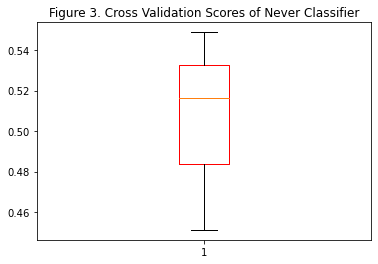

In [171]:
# plot
plt.boxplot(cv_never, boxprops=dict(color='red'))
plt.title('Figure 3. Cross Validation Scores of Never Classifier');

In [172]:
# SMOTE
# Create synthetic data for the minority class, fraud instances
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', y.shape)
print('Resample dataset shape', y_smote.shape)


print('Original Counts:', Counter(y))
print('Resampled datset Counts', Counter(y_smote))

Original dataset shape (284807,)
Resample dataset shape (568630,)
Original Counts: Counter({0: 284315, 1: 492})
Resampled datset Counts Counter({0: 284315, 1: 284315})


In [173]:
# Splitting the SMOTE Data
X_train_SMOTE, X_test_SMOTE, y_train_SMOTE, y_test_SMOTE = train_test_split(x_smote, y_smote, random_state=0, train_size = .75)

In [176]:
#sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# accuracy: the fraction of correct predictions over the total number of samples
cv_SMOTE = cross_val_score(sgd_clf, X_train_SMOTE, y_train_SMOTE, cv=3, scoring="accuracy")

cv_SMOTE.mean()

0.9462708006625445

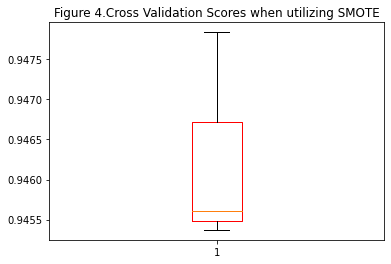

In [177]:
# plot
plt.boxplot(cv_SMOTE, boxprops=dict(color='red'))
plt.title('Figure 4.Cross Validation Scores when utilizing SMOTE');

In [178]:
cv_SMOTE_never = cross_val_score(Never5Classifier(), X_train_SMOTE, y_train_SMOTE, cv=3, scoring="accuracy")

cv_SMOTE_never.mean()

0.5005228919067392

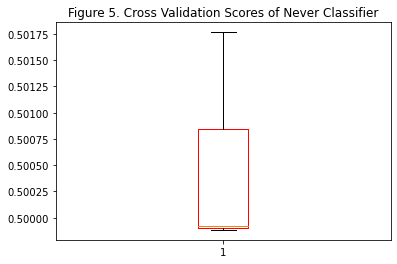

In [179]:
# plot
plt.boxplot(cv_SMOTE_never, boxprops=dict(color='red'))
plt.title('Figure 5. Cross Validation Scores of Never Classifier');

Now, we will implement the Random Oversampling Technique.

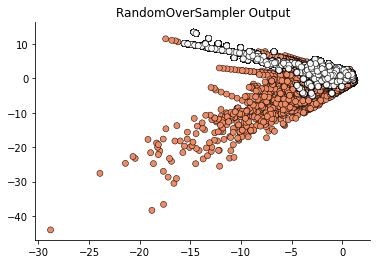

In [180]:
import seaborn as sns

ROS = RandomOverSampler(random_state=0)
ROS.fit(X, y)
X_over, y_over = ros.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_over[:, 0], X_over[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomOverSampler Output")
pass

In [181]:
print('Original dataset shape', y.shape)
print('Resample dataset shape', y_over.shape)
print('Original Counts:', Counter(y))
print('Resampled datset Counts', Counter(y_over))

Original dataset shape (284807,)
Resample dataset shape (568630,)
Original Counts: Counter({0: 284315, 1: 492})
Resampled datset Counts Counter({0: 284315, 1: 284315})


In [182]:
# Splitting the SMOTE Data
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, random_state=0, train_size = .75)

In [183]:
# accuracy: the fraction of correct predictions over the total number of samples
cv_over = cross_val_score(sgd_clf, X_train_over, y_train_over, cv=3, scoring="accuracy")

cv_over.mean()

0.9465474892753271

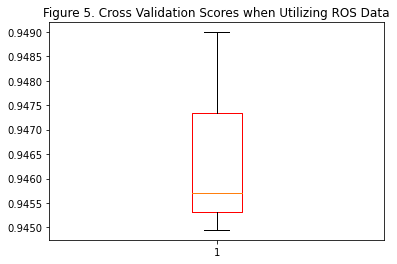

In [184]:
# plot
plt.boxplot(cv_over, boxprops=dict(color='red'))
plt.title('Figure 5. Cross Validation Scores when Utilizing ROS Data');

In [185]:
cv_over_never = cross_val_score(Never5Classifier(), X_train_over, y_train_over, cv=3, scoring="accuracy")

cv_over_never.mean()

0.5005228919067392

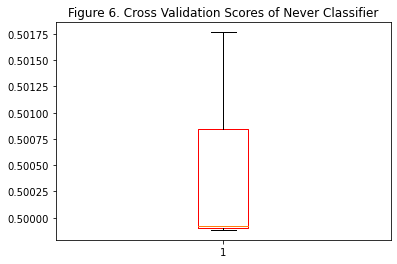

In [186]:
# plot
plt.boxplot(cv_SMOTE_never, boxprops=dict(color='red'))
plt.title('Figure 6. Cross Validation Scores of Never Classifier');

# Energy Efficiency Data Set 

## Regression

In [187]:
# Read in Energy Efficiency Data Set


energy_df = pd.read_excel('C:/Users/12563/Documents/Statistical & Machine Learning (MATH 6388)/Project/ENB2012_data.xlsx')

#Look at the energy Data
energy_df


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


We can see that the energy Data Frame contains 8 features with 2 response variables. 

In [188]:
# Checking the Data Types of the Features 
# & Response Variables

energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [189]:
# We will use the "describe" function to
# generate descriptive statistics

energy_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<AxesSubplot:>

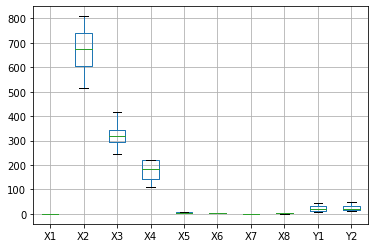

In [190]:
energy_df.boxplot()

array([[<AxesSubplot:title={'center':'X1'}>,
        <AxesSubplot:title={'center':'X2'}>,
        <AxesSubplot:title={'center':'X3'}>],
       [<AxesSubplot:title={'center':'X4'}>,
        <AxesSubplot:title={'center':'X5'}>,
        <AxesSubplot:title={'center':'X6'}>],
       [<AxesSubplot:title={'center':'X7'}>,
        <AxesSubplot:title={'center':'X8'}>,
        <AxesSubplot:title={'center':'Y1'}>],
       [<AxesSubplot:title={'center':'Y2'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

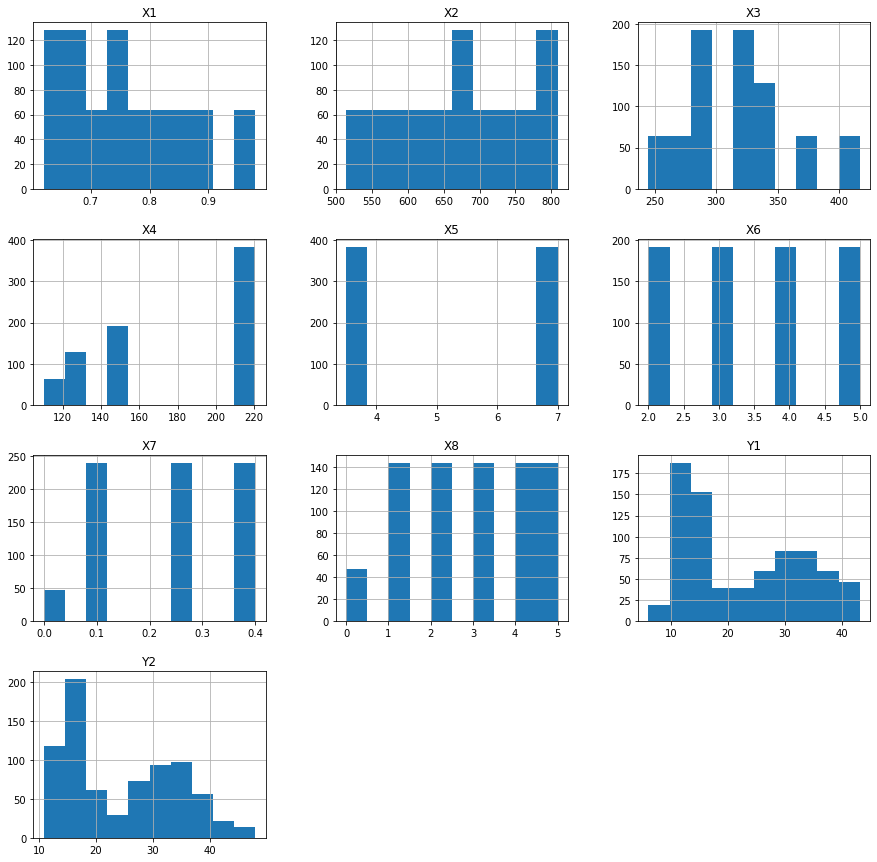

In [108]:
energy_df.hist(figsize = (15,15))

We can see that all of the variables we are working with do not contain null values. All variables are also all numerical (Continuous) not Categorical variables, i.e. we do not need to create Dummy variables here. 

Note that our goal in this problem is to predict two outputs. 
Now we will implement Linear and Logistic Regression to predict the two outputs (y_e_1, y_e_2).

We could consider concatenating the two response vectors into one. We could also consider putting Y1 into the feature matrix to predict Y2 and vice versa with Y2 in the feature matrix to predict Y1. We could also try both methods & see which one performs better. 

In [191]:
# Create the Feature Matrix & convert to Numpy Array

X_e = energy_df.drop(columns = ['Y1', 'Y2']).to_numpy()
X_e

array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [9.800e-01, 5.145e+02, 2.940e+02, ..., 4.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 3.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 4.000e+00, 4.000e-01,
        5.000e+00],
       [6.200e-01, 8.085e+02, 3.675e+02, ..., 5.000e+00, 4.000e-01,
        5.000e+00]])

In [192]:
# Check the Shape of X
X_e.shape

(768, 8)

In [193]:
# Scale X
X_e = scaler.fit_transform(X_e)

In [64]:
# Creating the Y Vectors which will contain the 2 response
# variables

y_e_1 = energy_df['Y1'].to_numpy()
y_e_2 = energy_df['Y2'].to_numpy()


In [203]:
# Predict the Heating Load Y1, including the Cooling Load Y2
# Creating X with Y2 included, not Y1
X_e_y2 = energy_df.drop(columns = ['Y1']).to_numpy()
# Scale X
X_e_y2 = scaler.fit_transform(X_e_y2)

# Split the data into train and test sets
X_train_y2, X_test_y2, y_train_y2, y_test_y2 = train_test_split(X_e_y2, y_e_1, test_size= 0.2, train_size=0.8, random_state=33)

# Linear Regression
regr = linear_model.LinearRegression()

# Fitting the Linear Regression model with appropiate Data
regr.fit(X_train_y2, y_train_y2)

# Make predictions using the testing set
y_pred_y2 = regr.predict(X_test_y2)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y2, y_pred_y2))

# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y2, y_pred_y2))

Mean squared error: 2.72
Coefficient of determination: 0.97


In [195]:
# Polynomial Regression
# Predicting Y1 with Y2 in Feature matrix


pipe.fit(X_train_y2, y_train_y2) # training

# Make predictions using the testing set
y_pred_y2_poly = pipe.predict(X_test_y2)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y2, y_pred_y2_poly))

# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y2, y_pred_y2_poly))

Mean squared error: 0.47
Coefficient of determination: 1.00


In [196]:
# Predict Y1 without Y2

# Split the data into train and test sets
X_train_y1_1, X_test_y1_1, y_train_y1_1, y_test_y1_1 = train_test_split(X_e, y_e_1, test_size= 0.2, train_size=0.8, random_state=33)

# Fitting the Linear Regression model with appropiate Data
regr.fit(X_train_y1_1, y_train_y1_1)

# Make predictions using the testing set
y_pred_y1_1 = regr.predict(X_test_y1_1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y1_1, y_pred_y1_1))

# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y1_1, y_pred_y1_1))

Mean squared error: 8.55
Coefficient of determination: 0.91


In [197]:
# Polynomial Regression
# Y1 w/o Y2


pipe.fit(X_train_y1_1, y_train_y1_1) # training

# Make predictions using the testing set
y_pred_y1_1_poly = pipe.predict(X_test_y1_1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y1_1, y_pred_y1_1_poly))

# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y1_1, y_pred_y1_1_poly))

Mean squared error: 0.53
Coefficient of determination: 0.99


In [199]:
# Predict Y2 by including Y1 in the Feature Matrix
# Creating X with Y1 included, and not Y2
X_e_y1 = energy_df.drop(columns = ['Y2']).to_numpy()
# Scale X
X_e_y1 = scaler.fit_transform(X_e_y1)

In [200]:
# Split the data into train and test sets
X_train_y1, X_test_y1, y_train_y1, y_test_y1 = train_test_split(X_e_y1, y_e_2, test_size= 0.2, train_size=0.8, random_state=33)

In [204]:
# Linear Regression
regr = linear_model.LinearRegression()
#pipe = Pipeline(steps=[('regr', LinearRegression(fit_intercept=False))])

In [205]:
# Train the model using the training set
regr.fit(X_train_y1, y_train_y1)

LinearRegression()

In [206]:
# Make predictions using the testing set
y_pred_y1 = regr.predict(X_test_y1)

In [207]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y1, y_pred_y1))

Mean squared error: 3.78


In [208]:
# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y1, y_pred_y1))

Coefficient of determination: 0.96


In [209]:
# Polynomial Regression

pipe = Pipeline(steps=[
('poly', PolynomialFeatures(degree=2, include_bias=False)),
('regr', LinearRegression())])

pipe.fit(X_train_y1, y_train_y1) # training

# Make predictions using the testing set
y_pred_y1_poly = pipe.predict(X_test_y1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y1, y_pred_y1_poly))

# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y1, y_pred_y1_poly))

Mean squared error: 2.23
Coefficient of determination: 0.98


In [210]:
# Predict Y2 without Y1

# Split the data into train and test sets
X_train_y2_1, X_test_y2_1, y_train_y2_1, y_test_y2_1 = train_test_split(X_e, y_e_2, test_size= 0.2, train_size=0.8, random_state=33)

# Fitting the Linear Regression model with appropiate Data
regr.fit(X_train_y2_1, y_train_y2_1)

# Make predictions using the testing set
y_pred_y2_1 = regr.predict(X_test_y2_1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y2_1, y_pred_y2_1))

# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y2_1, y_pred_y2_1))

Mean squared error: 11.53
Coefficient of determination: 0.87


In [211]:
# Polynomial Regression
# Y2 w/o Y1


pipe.fit(X_train_y2_1, y_train_y2_1) # training

# Make predictions using the testing set
y_pred_y2_1_poly = pipe.predict(X_test_y2_1)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test_y2_1, y_pred_y2_1_poly))

# coefficient of determination

print("Coefficient of determination: %.2f" % r2_score(y_test_y2_1, y_pred_y2_1_poly))

Mean squared error: 2.59
Coefficient of determination: 0.97
